In [18]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron, LogisticRegression

## Reading Data

Original Data

In [13]:
data = pd.read_excel('global_warming_tweets.xls')
data.drop_duplicates(subset=["tweet"], inplace=True)
data.head()

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087
5,RT @sejorg: RT @JaymiHeimbuch: Ocean Saltiness...,Yes,1.0000


Web Scraped Data

In [14]:
rawScrapedTweets = []

with open("scrapedTweets.txt") as fh:
    d = fh.read()
    rawScrapedTweets = d.split('\n')

scrapedTweets = pd.DataFrame(rawScrapedTweets, columns=["tweets"])

print(scrapedTweets.shape)
scrapedTweets.head()

(503, 1)


,tweets
0,A small but growing number of older people are...
1,this might sound cynical but i’ve always wonde...
2,Climate Change is the biggest scam of the last...
3,Vegans will literally come after Indigenous pe...
4,"Türkiye should be central to environment, clim..."


## Testing

Data Exploration

<BarContainer object of 2 artists>

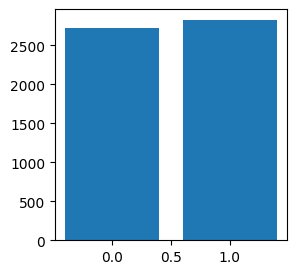

In [6]:
size = len(data["existence"])
cnt = [0, 0]

for val in data["existence"]:
    if pd.isnull(val) or val == "N" or val == "No":
        cnt[0] += 1
    else:
        cnt[1] += 1

plt.figure(figsize=(3,3))
plt.bar([0, 1], cnt)

Running Algorithms

In [76]:
%run ./jlu_preprocessing.ipynb

X, Y = preprocess(data)

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [78]:
# model = DecisionTreeClassifier()
model = LogisticRegression()
# model = Perceptron()

cv = cross_validate(model, X_train, Y_train, cv=10, return_estimator=True, return_train_score=True)
print(cv["train_score"], "\n", cv["test_score"])

i = np.argmax(cv["test_score"])
model = cv["estimator"][i]

clf = model.fit(X_train, Y_train)

pred = model.predict(X_train)
pred2 = model.predict(X_test)

[0.87363448 0.87452022 0.87097727 0.87747269 0.87514758 0.87101535
 0.87957497 0.87691854 0.87190083 0.87219599] 
 [0.72944297 0.72413793 0.74801061 0.71883289 0.7287234  0.73138298
 0.67287234 0.74468085 0.76329787 0.71010638]


In [79]:
from sklearn.metrics import accuracy_score

print("Training accuracy: ", accuracy_score(Y_train, pred))
print("Testing accuracy: ", accuracy_score(Y_test, pred2))

Training accuracy:  0.8674282678002125
Testing accuracy:  0.7208067940552016


In [11]:
### No additional preprocessing

## Logistic Regression
#Training accuracy: 0.8524368231046932
#Testing accuracy:  0.7105500450856628

## Perceptron
#Training accuracy:  0.9318592057761733
#Testing accuracy:  0.6853020739404869